In [1]:
library(TxDb.Mmusculus.UCSC.mm10.knownGene)
library(org.Mm.eg.db)
library(GenomicRanges)
library(dplyr)
library(ChIPseeker)
library(ChIPpeakAnno)
library(VennDiagram)
library(ggplot2)

Loading required package: GenomicFeatures
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colnames, do.call,
    duplicated, eval, evalq, Filter, Find, get, grep, grepl, intersect,
    is.unsorted, lapply, lengths, Map, mapply, match, mget, order,
    paste, pmax, pmax.int, pmin, pmin.int, Position, rank, rbind,
    Reduce, rownames, sapply, setdiff, sort, table, tapply, union,
    unique, unsplit, which, which.max, which.min

Loading required package: S4Vectors
Loading required package: stats4

Attaching package: ‘S

In [2]:
workingDir <- "/home/mproffitt/_sequencingData/_FromZaki/annotated/loop"
f1 <- read.delim(file.path(workingDir, "GL21_Hdac1.txt"))
f2 <- read.delim(file.path(workingDir, "GL21_Hdac2.txt"))
f3 <- read.delim(file.path(workingDir, "GL30_COREST.txt"))



In [3]:
GL21_Hdac1 <- GRanges(seqnames=f1$seqnames, ranges=IRanges(start=f1$start, end=f1$end, names=paste("p", 1:nrow(f1), sep="")))
GL21_Hdac2 <- GRanges(seqnames=f2$seqnames, ranges=IRanges(start=f2$start, end=f2$end, names=paste("p", 1:nrow(f2), sep="")))
GL30_COREST <- GRanges(seqnames=f3$seqnames, ranges=IRanges(start=f3$start, end=f3$end, names=paste("p", 1:nrow(f3), sep="")))

In [4]:
ol <- findOverlapsOfPeaks(GL21_Hdac1, GL21_Hdac2, GL30_COREST, maxgap=1, connectedPeaks="merge")

Missing totalTest! totalTest is required for HyperG test. 
If totalTest is missing, pvalue will be calculated by estimating 
the total binding sites of encoding region of human.
totalTest = humanGenomeSize * (2%(codingDNA) + 
             1%(regulationRegion)) / ( 2 * averagePeakWidth )
          = 3.3e+9 * 0.03 / ( 2 * averagePeakWidth)
          = 5e+7 /averagePeakWidth


$p.value
     GL21_Hdac1 GL21_Hdac2 GL30_COREST pval
[1,]          0          1           1    1
[2,]          1          0           1    1
[3,]          1          1           0    0

$vennCounts
     GL21_Hdac1 GL21_Hdac2 GL30_COREST Counts
[1,]          0          0           0      0
[2,]          0          0           1   7716
[3,]          0          1           0  12900
[4,]          0          1           1    249
[5,]          1          0           0   5475
[6,]          1          0           1     91
[7,]          1          1           0  10318
[8,]          1          1           1    573
attr(,"class")
[1] "VennCounts"


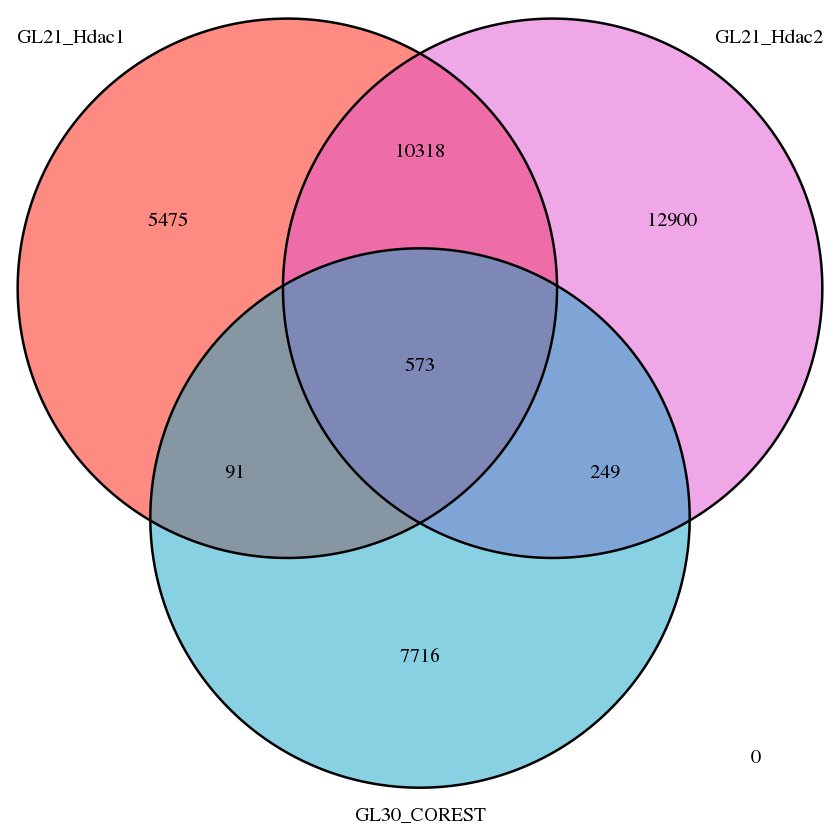

In [5]:
makeVennDiagram(ol, NameOfPeaks = c("GL21_Hdac1", "GL21_Hdac2", "GL30_COREST"), fill=c("#fc1704", "#df4ed0", "#0ea4c5"))

In [6]:
f1_rmDupe <- read.delim(file.path(workingDir, "GL21_Hdac1_rmDupe.txt"))
f2_rmDupe <- read.delim(file.path(workingDir, "GL21_Hdac2_rmDupe.txt"))
f3_rmDupe <- read.delim(file.path(workingDir, "GL30_COREST_rmDupe.txt"))

In [7]:
GL21_Hdac1_rmDupe <- GRanges(seqnames=f1_rmDupe$seqnames, ranges=IRanges(start=f1_rmDupe$start, end=f1_rmDupe$end, names=paste("p", 1:nrow(f1_rmDupe), sep="")))
GL21_Hdac2_rmDupe <- GRanges(seqnames=f2_rmDupe$seqnames, ranges=IRanges(start=f2_rmDupe$start, end=f2_rmDupe$end, names=paste("p", 1:nrow(f2_rmDupe), sep="")))
GL30_CORST_rmDupe <- GRanges(seqnames=f3_rmDupe$seqnames, ranges=IRanges(start=f3_rmDupe$start, end=f3_rmDupe$end, names=paste("p", 1:nrow(f3_rmDupe), sep="")))

In [8]:
ol <- findOverlapsOfPeaks(GL21_Hdac1_rmDupe, GL21_Hdac2_rmDupe, GL30_CORST_rmDupe, maxgap=1, connectedPeaks="merge")

Missing totalTest! totalTest is required for HyperG test. 
If totalTest is missing, pvalue will be calculated by estimating 
the total binding sites of encoding region of human.
totalTest = humanGenomeSize * (2%(codingDNA) + 
             1%(regulationRegion)) / ( 2 * averagePeakWidth )
          = 3.3e+9 * 0.03 / ( 2 * averagePeakWidth)
          = 5e+7 /averagePeakWidth


$p.value
     GL21_Hdac1_rmDupe GL21_Hdac2_rmDupe GL30_COREST_rmDupe pval
[1,]                 0                 1                  1    1
[2,]                 1                 0                  1    1
[3,]                 1                 1                  0    0

$vennCounts
     GL21_Hdac1_rmDupe GL21_Hdac2_rmDupe GL30_COREST_rmDupe Counts
[1,]                 0                 0                  0      0
[2,]                 0                 0                  1   7716
[3,]                 0                 1                  0  12900
[4,]                 0                 1                  1    249
[5,]                 1                 0                  0   5475
[6,]                 1                 0                  1     91
[7,]                 1                 1                  0  10318
[8,]                 1                 1                  1    573
attr(,"class")
[1] "VennCounts"


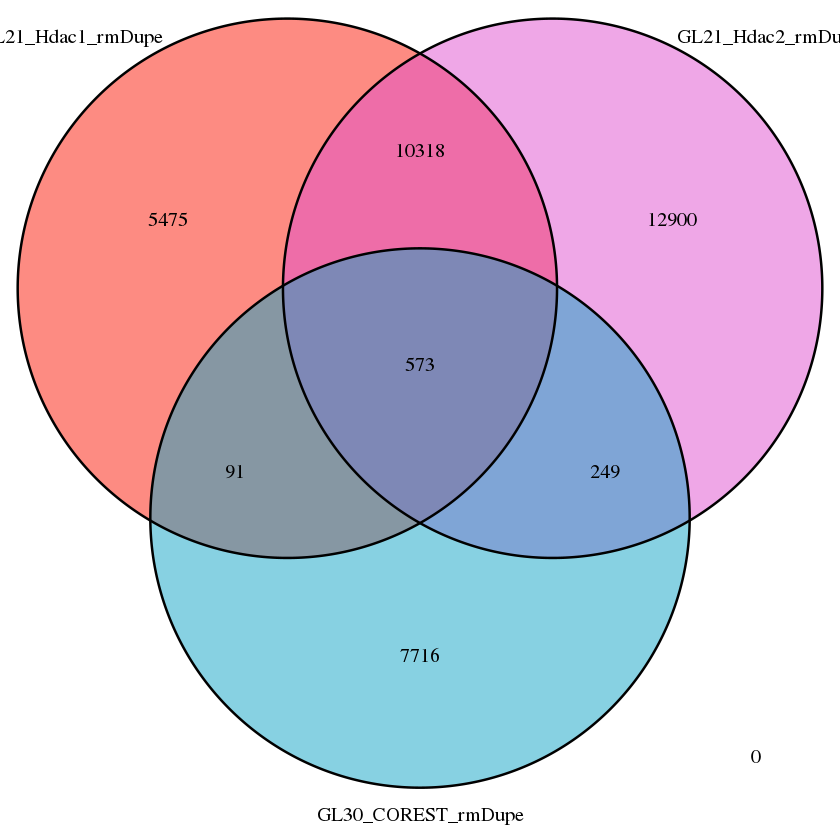

In [9]:
makeVennDiagram(ol, NameOfPeaks = c("GL21_Hdac1_rmDupe", "GL21_Hdac2_rmDupe", "GL30_COREST_rmDupe"), fill=c("#fc1704", "#df4ed0", "#0ea4c5"))